In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
# Other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 #distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1]) #this creates a nonlinear function with a few bumps and some curves

In [ ]:
X.shape

(1000, 2)

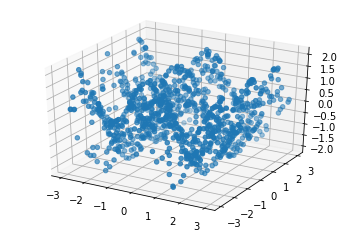

In [ ]:
# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

In [ ]:
# Compile with a learning rate of 0.01
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=98)

Epoch 1/98
32/32 [==============================] - 0s 1ms/step - loss: 0.9892
Epoch 2/98
32/32 [==============================] - 0s 1ms/step - loss: 0.9151
Epoch 3/98
32/32 [==============================] - 0s 1ms/step - loss: 0.9158
Epoch 4/98
32/32 [==============================] - 0s 1ms/step - loss: 0.8767
Epoch 5/98
32/32 [==============================] - 0s 1ms/step - loss: 0.8495
Epoch 6/98
32/32 [==============================] - 0s 1ms/step - loss: 0.8134
Epoch 7/98
32/32 [==============================] - 0s 1ms/step - loss: 0.7097
Epoch 8/98
32/32 [==============================] - 0s 1ms/step - loss: 0.6894
Epoch 9/98
32/32 [==============================] - 0s 1ms/step - loss: 0.6348
Epoch 10/98
32/32 [==============================] - 0s 1ms/step - loss: 0.6421
Epoch 11/98
32/32 [==============================] - 0s 1ms/step - loss: 0.5642
Epoch 12/98
32/32 [==============================] - 0s 1ms/step - loss: 0.5492
Epoch 13/98
32/32 [==============================

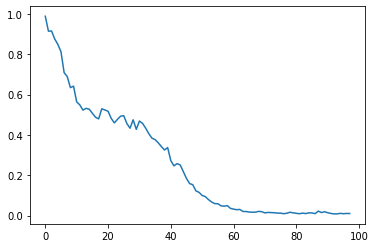

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

[ 0.25589764  0.04005873 -0.17578113 ... -0.41777098 -0.20197046
  0.01382816]


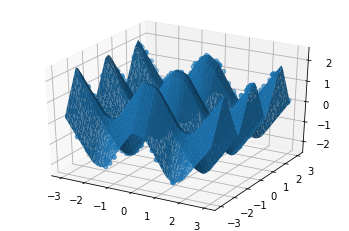

In [ ]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface the plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
print(Yhat);
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

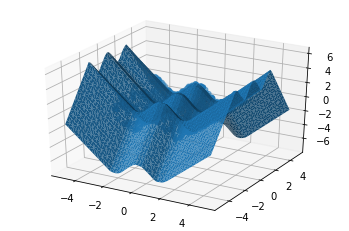

In [ ]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()